In [1]:
import epics
import numpy as _np

from mathphys.imgproc import Image2D_Fit as _Image2D_Fit
from siriuspy.devices import Device as _Device, DVF as _DVF

In [2]:
class DVFImgProc(_DVF):
    """."""
    
    _properties = _DVF._properties + (
        'ImgROIX-SP', 'ImgROIX-RB',
        'ImgROIY-SP', 'ImgROIY-RB',
        'ImgROIXCenter-Mon', 'ImgROIYCenter-Mon',
        'ImgROIXFWHM-Mon', 'ImgROIYFWHM-Mon',
        'ImgROIXUpdateWithFWHMFactor-SP', 'ImgROIXUpdateWithFWHMFactor-RB',
        'ImgROIYUpdateWithFWHMFactor-SP', 'ImgROIYUpdateWithFWHMFactor-RB',
        'ImgROIUpdateWithFWHM-Sel', 'ImgROIUpdateWithFWHM-Sts',
    )
    
    def __init__(self, devname, *args, **kwargs):
        """."""
        super().__init__(devname=devname, *args, **kwargs)
        self.wait_for_connection(timeout=5)
        self.cmd_update()
        
    @property
    def roiy(self):
        """."""
        return self['ImgROIY-RB']
    
    @roiy.setter
    def roiy(self, value):
        """."""
        self['ImgROIY-SP'] = value
    
    @property
    def roix(self):
        """."""
        return self['ImgROIX-RB']
    
    @roix.setter
    def roix(self, value):
        """."""
        self['ImgROIX-SP'] = value

    @property
    def roiy_center(self):
        """."""
        return self['ImgROIYCenter-Mon']
    
    @property
    def roix_center(self):
        """."""
        return self['ImgROIXCenter-Mon']
    
    @property
    def roiy_fwhm(self):
        """."""
        return self['ImgROIYFWHM-Mon']
    
    @property
    def roix_fwhm(self):
        """."""
        return self['ImgROIXFWHM-Mon']
    
    @property
    def fwhmy_factor(self):
        """."""
        return self['ImgROIYUpdateWithFWHMFactor-RB']
    
    @fwhmy_factor.setter
    def fwhmy_factor(self, value):
        """."""
        self['ImgROIYUpdateWithFWHMFactor-SP'] = value
        
    @property
    def fwhmx_factor(self):
        """."""
        return self['ImgROIXUpdateWithFWHMFactor-RB']
    
    @fwhmx_factor.setter
    def fwhmx_factor(self, value):
        """."""
        self['ImgROIXUpdateWithFWHMFactor-SP'] = value
    
    @property
    def roi_with_fwhm(self):
        """."""
        return self['ImgROIUpdateWithFWHM-Sts']
    
    @roi_with_fwhm.setter
    def roi_with_fwhm(self, value):
        """."""
        self['ImgROIUpdateWithFWHM-Sel'] = value == True
        
    @property
    def image2dfit(self):
        """."""
        return self._image2dfit
    
    def cmd_update(self):
        """."""
        self._image2dfit = _Image2D_Fit(data=self.image, roix=self.roix, roiy=self.roiy)

In [3]:
DVFImgProc.DEVICES.CAX_DVF2

'CAX:B:BASLER01'

In [4]:
dvfimgproc = DVFImgProc(devname=DVFImgProc.DEVICES.CAX_DVF2)

In [5]:
dvfimgproc.cmd_acquire_on()
dvfimgproc.cmd_update()
img = dvfimgproc.image2dfit

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 4
intensity_avg   : 0.9334739685058594
intensity_sum   : 1223523
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 874
intensity_max   : 1031
intensity_avg   : 955.87734375
intensity_sum   : 1223523
saturation_val  : 255
saturated       : False
roi             : [200 600]
roi_center      : 351
roi_fwhm        : 399
roi_amplitude   : 85.84022432469496
roi_mean        : 403.2988543453269
roi_sigma       : 970.9548954683925
roi_fit_err     : 3.0566886957184476 %
roi_amplitude   : 85.84022432469496
roi_mean        : 403.2988543453269
roi_sigma       : 970.9548954683925
roi_fit_err     : 3.0566886957184476 %
--- fity ---
size            : 1024
intensity_min   : 1009
intensity_max   : 1489
intensity_avg   : 1194.8466796875
intensity_sum   : 1223523
saturation_val  : 255
saturated       : False
roi             : [200 400]
roi_center      : 201
roi_fwhm        :

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d2d7efbe0>)

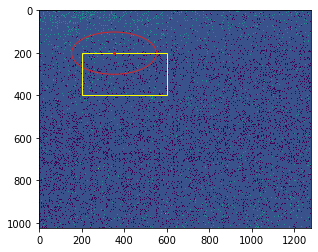

In [6]:
print(img)
img.imshow()

In [7]:
print(dvfimgproc.roix, dvfimgproc.roiy)

[200 600] [200 400]


In [112]:
dvfimgproc.roix = [200, 600]
dvfimgproc.roiy = [200, 400]

In [113]:
print(dvfimgproc.roix_center, dvfimgproc.roiy_center)

239 200


In [114]:
print(dvfimgproc.roix_fwhm, dvfimgproc.roiy_fwhm)

399 199


In [115]:
print(dvfimgproc.fwhmx_factor, dvfimgproc.fwhmy_factor)

1.5 1.5


In [104]:
dvfimgproc.fwhmx_factor = 1.5
dvfimgproc.fwhmy_factor = 1.5

In [105]:
dvfimgproc.roi_with_fwhm

1

In [106]:
dvfimgproc.roi_with_fwhm = True

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 4
intensity_avg   : 0.9262153625488281
intensity_sum   : 1214009
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 851
intensity_max   : 1021
intensity_avg   : 948.44453125
intensity_sum   : 1214009
saturation_val  : 255
saturated       : False
roi             : [200 600]
roi_center      : 351
roi_fwhm        : 399
roi_amplitude   : 102.90863231343056
roi_mean        : 393.33904184119217
roi_sigma       : 586.9230990607855
roi_fit_err     : 3.3139295828540347 %
roi_amplitude   : 102.90863231343056
roi_mean        : 393.33904184119217
roi_sigma       : 586.9230990607855
roi_fit_err     : 3.3139295828540347 %
--- fity ---
size            : 1024
intensity_min   : 981
intensity_max   : 1527
intensity_avg   : 1185.5556640625
intensity_sum   : 1214009
saturation_val  : 255
saturated       : False
roi             : [200 400]
roi_center      : 202
roi_fwhm      

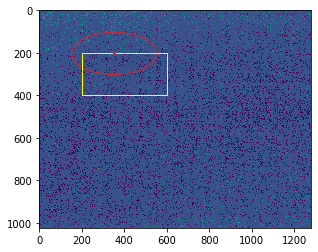

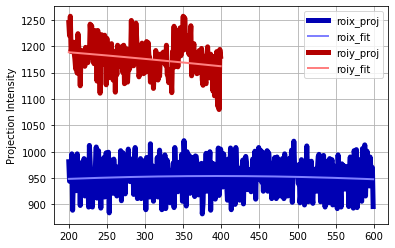

In [107]:
dvfimgproc.cmd_update()
img = dvfimgproc.image2dfit
print(img)
img.imshow()
img.plot_projections()

In [56]:
print(img)

sizey           : 1024
sizex           : 1280
intensity_min   : 0
intensity_max   : 182
intensity_avg   : 1.6747734069824218
intensity_sum   : 2195159
saturation_val  : 255
saturated       : False
--- fitx ---
size            : 1280
intensity_min   : 928
intensity_max   : 10588
intensity_avg   : 1714.96796875
intensity_sum   : 2195159
saturation_val  : 255
saturated       : False
roi             : [368 558]
roi_center      : 460
roi_fwhm        : 96
roi_amplitude   : 9033.741208981864
roi_mean        : 456.1244833602748
roi_sigma       : 38.26839927655697
roi_fit_err     : 5.161581101930484 %
roi_amplitude   : 9033.741208981864
roi_mean        : 456.1244833602748
roi_sigma       : 38.26839927655697
roi_fit_err     : 5.161581101930484 %
--- fity ---
size            : 1024
intensity_min   : 1061
intensity_max   : 17599
intensity_avg   : 2143.7099609375
intensity_sum   : 2195159
saturation_val  : 255
saturated       : False
roi             : [232 326]
roi_center      : 280
roi_fwhm       